# Project Objectives
- Data Summary: Describe the dataset size, key variables, and target variable.
- Objective of the Analysis: Clearly state what the analysis aims to achieve.
- Model Comparison: Compare variations of linear regression and select the best one.
- Key Findings: Present meaningful insights that align with the objective.
- Limitations and Next Steps: Identify model flaws and outline future improvements

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the data

In [2]:
import pandas as pd
from sqlalchemy import create_engine

# Replace with your actual database details
username = "postgres"
password = "2552085124rR!"
host = "localhost"        # e.g. 'localhost' or IP
port = "5432"             # default for PostgreSQL
database = "QuantProject"

# Create the SQLAlchemy engine
engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

# Query to fetch data
query = "SELECT * FROM sp500_ohlcv"

# Read the data into a DataFrame
df = pd.read_sql(query, engine)

# Show the first few rows
print(df.head())


        date ticker       open       high        low      close      volume
0 2017-07-19      A  57.725433  58.026675  57.584225  57.781918   1512200.0
1 2017-07-19   AAPL  35.051237  35.270191  34.927785  35.177021  83692000.0
2 2017-07-19   ABBV  51.495189  51.701221  51.168366  51.701221   3904100.0
3 2017-07-19    ABT  42.381691  42.963573  42.346951  42.928833   6485000.0
4 2017-07-19   ACGL  30.672817  30.939068  30.672817  30.888353    760800.0


# Part 1: Exploratory Data Analysis

- Get the basic information on the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003161 entries, 0 to 1003160
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   date    1003161 non-null  datetime64[ns]
 1   ticker  1003161 non-null  object        
 2   open    991095 non-null   float64       
 3   high    991095 non-null   float64       
 4   low     1003161 non-null  float64       
 5   close   991095 non-null   float64       
 6   volume  991095 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 53.6+ MB


| Column   | Non-null count | Expected            |
| -------- | -------------- | ------------------- |
| `date`   | 1,003,161      | ✅                   |
| `ticker` | 1,003,161      | ✅                   |
| `open`   | 991,095        | ⚠️ Missing \~12,000 |
| `high`   | 991,095        | ⚠️ Missing \~12,000 |
| `low`    | 1,003,161      | ✅                   |
| `close`  | 991,095        | ⚠️ Missing \~12,000 |
| `volume` | 991,095        | ⚠️ Missing \~12,000 |


- low is the only price-related column that doesn't have missing values — that’s unusual.
- open, high, close, and volume all have the same number of non-null values — this likely means those rows are missing all four values together.
- You are not missing columns, but you have missing values in existing columns.

- Number of columns and number of rows

In [4]:
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 1003161, Columns: 7


- Variable Description

In [5]:
print(df.describe())

                                date           open           high  \
count                        1003161  991095.000000  991095.000000   
mean   2021-07-28 21:33:59.515889664     144.367283     146.076336   
min              2017-07-19 00:00:00       0.770000       0.820000   
25%              2019-08-05 00:00:00      45.878433      46.419286   
50%              2021-08-04 00:00:00      84.879997      85.859401   
75%              2023-07-28 00:00:00     159.413434     161.182975   
max              2025-07-18 00:00:00    9914.169922    9964.769531   
std                              NaN     301.638911     305.270506   

                low          close        volume  
count  1.003161e+06  991095.000000  9.910950e+05  
mean   8.315222e+03     144.382346  6.284771e+06  
min    7.600000e-01       0.780000  0.000000e+00  
25%    4.572249e+01      45.873402  1.020400e+06  
50%    8.484868e+01      84.871292  2.149000e+06  
75%    1.599542e+02     159.435524  4.924700e+06  
max    3.410

# Statistical Summary Table
| **Metric**       | **Date**            | **Open** | **High** | **Low**    | **Close** | **Volume**    |
| ---------------- | ------------------- | -------- | -------- | ---------- | --------- | ------------- |
| **Count**        | 1,003,161           | 991,095  | 991,095  | 1,003,161  | 991,095   | 991,095       |
| **Mean**         | 2021-07-28 21:33:59 | 144.37   | 146.08   | 8,315.22   | 144.38    | 6,284,771     |
| **Min**          | 2017-07-19          | 0.77     | 0.82     | 0.76       | 0.78      | 0             |
| **25% (Q1)**     | 2019-08-05          | 45.88    | 46.42    | 45.72      | 45.87     | 1,020,400     |
| **Median (50%)** | 2021-08-04          | 84.88    | 85.86    | 84.85      | 84.87     | 2,149,000     |
| **75% (Q3)**     | 2023-07-28          | 159.41   | 161.18   | 159.95     | 159.44    | 4,924,700     |
| **Max**          | 2025-07-18          | 9,914.17 | 9,964.77 | 34,109,800 | 9,924.40  | 2,511,528,000 |
| **Std Dev**      | —                   | 301.64   | 305.27   | 213,126.50 | 301.71    | 25,929,300    |


### Data Distribution:
- The date ranges from 2017-07-19 to 2025-07-18.
- There are around 991k valid entries for most price columns.

### Price Insights:
- The average open and close prices are around 144, but prices vary greatly (high standard deviation).
- The min prices show some very low values, likely from penny stocks or data errors.
- The max values, especially for low and volume, seem abnormally high — possible outliers or data issues.

### Volume:
- Median volume is ~2.15 million.
- However, the maximum volume exceeds 2.5 billion, indicating high variance in traded shares.

# Major Red Flag
mean of 'low'  = 8,315.22
std of 'low'   = 213,126.5
max of 'low'   = 34,109,800

- This is nonsensical. S&P 500 tickers do not have low prices in the millions. This is likely dirty data (unit missmatch, corrupted data)

# Compare:
- mean open ≈ 144
- mean close ≈ 144
- mean low ≈ 8,315
- This confirms that some rows in low contain faulty or corrupt values even though they are technically not null.

### Perform Filtering

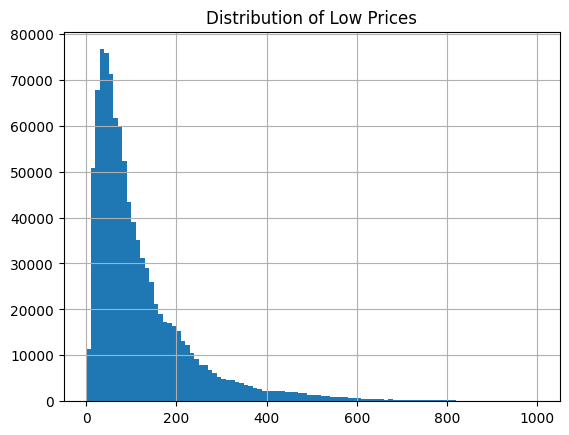

In [6]:
df['low'].hist(bins=100, range=(0, 1000))
plt.title('Distribution of Low Prices')
plt.show()

- Impute based on open/close:

In [7]:
df['low'] = df.apply(
    lambda row: (row['open'] + row['close']) / 2 if row['low'] > 5000 else row['low'],
    axis=1
)
df

,date,ticker,open,high,low,close,volume
0,2017-07-19,A,57.725433,58.026675,57.584225,57.781918,1512200.0
1,2017-07-19,AAPL,35.051237,35.270191,34.927785,35.177021,83692000.0
2,2017-07-19,ABBV,51.495189,51.701221,51.168366,51.701221,3904100.0
3,2017-07-19,ABT,42.381691,42.963573,42.346951,42.928833,6485000.0
4,2017-07-19,ACGL,30.672817,30.939068,30.672817,30.888353,760800.0
...,...,...,...,...,...,...,...
1003156,2025-07-18,High,NaN,NaN,219.850006,NaN,NaN
1003157,2025-07-18,Low,NaN,NaN,217.559998,NaN,NaN
1003158,2025-07-18,Close,NaN,NaN,219.160004,NaN,NaN
1003159,2025-07-18,Adj Close,NaN,NaN,219.160004,NaN,NaN


### Frequency counts for categorical columns

In [8]:
# Frequency counts for categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"\n How many times each value in each column appears for -> {col}:\n{df[col].value_counts()}")


 How many times each value in each column appears for -> ticker:
ticker
Volume    2011
A         2011
AAPL      2011
ABBV      2011
ABT       2011
          ... 
GEHC       648
KVUE       553
VLTO       448
SOLV       329
GEV        328
Name: count, Length: 508, dtype: int64


# Histogram of each numerical column

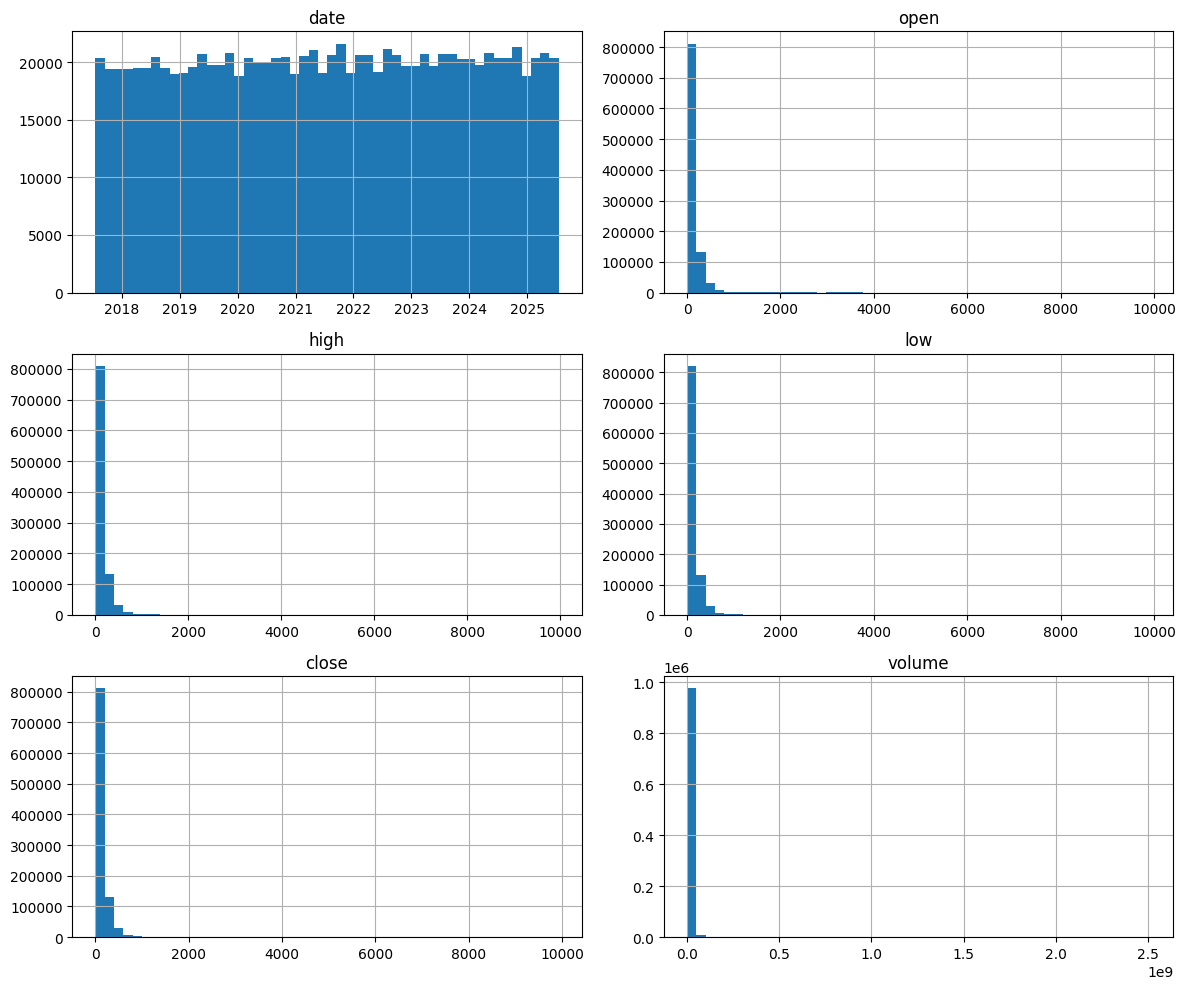

In [9]:
# Histogram 
df.hist(bins=50, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Distribution of tickers

Top 10 Tickers: 
 ticker
Volume    2011
A         2011
AAPL      2011
ABBV      2011
ABT       2011
ACGL      2011
ACN       2011
ADBE      2011
ADI       2011
ADM       2011
Name: count, dtype: int64


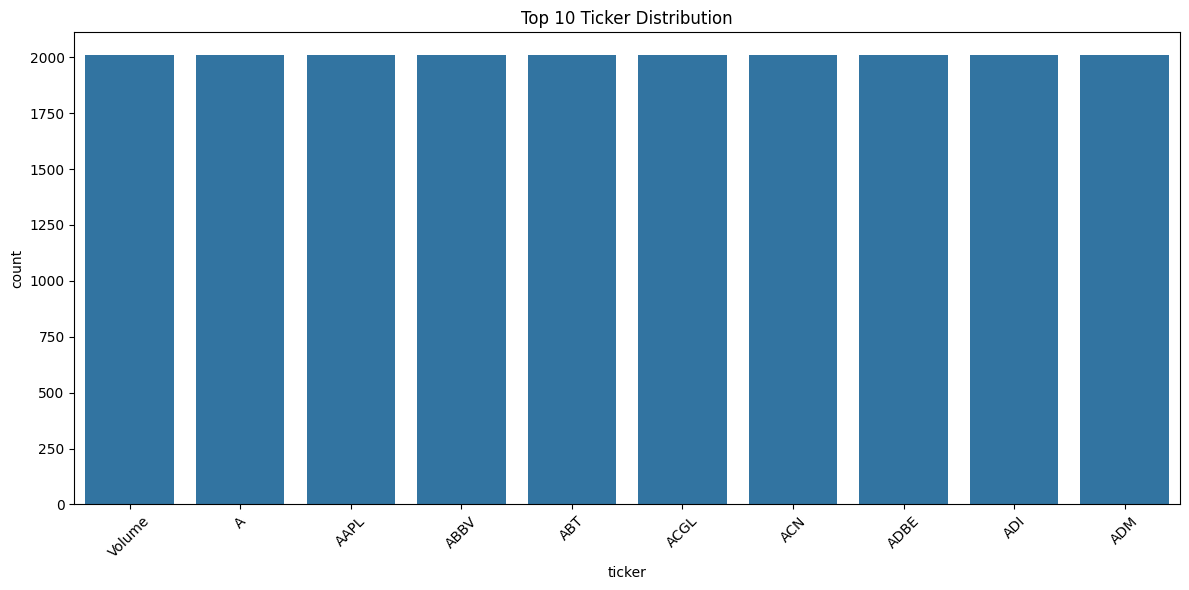

In [10]:
# Top 10 tickers in the dataset
top_tickers = df['ticker'].value_counts().head(10)
print("Top 10 Tickers: \n", top_tickers)

# Create a df to have only the top 10 tickers
filtered_df = df[df['ticker'].isin(top_tickers.index)]

# Plot
plt.figure(figsize=(12,6))
sns.countplot(data=filtered_df, x='ticker', order=top_tickers.index)
plt.title("Top 10 Ticker Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Feature Engineering

In [11]:
# Calendar Features

# convert to datetime
df['date'] = pd.to_datetime(df['date'])

# Convert to day of the week
df['day_of_week'] = df['date'].dt.dayofweek  # 0=Monday

# Convert to month
df['month'] = df['date'].dt.month

# adding a new column is_month_end to the DataFrame df that is True if the date in the date column is the last day of the month,
# otherwise False
df['is_month_end'] = df['date'].dt.is_month_end


# Part 2 Feature Engineering

- Price Features - Feature Engineering

In [12]:
# Daily return
df['daily_return'] = (df['close'] - df['open']) / df['open'] 
df.head(5)

,date,ticker,open,high,low,close,volume,day_of_week,month,is_month_end,daily_return
0,2017-07-19,A,57.725433,58.026675,57.584225,57.781918,1512200.0,2,7,False,0.000978
1,2017-07-19,AAPL,35.051237,35.270191,34.927785,35.177021,83692000.0,2,7,False,0.003589
2,2017-07-19,ABBV,51.495189,51.701221,51.168366,51.701221,3904100.0,2,7,False,0.004001
3,2017-07-19,ABT,42.381691,42.963573,42.346951,42.928833,6485000.0,2,7,False,0.012910
4,2017-07-19,ACGL,30.672817,30.939068,30.672817,30.888353,760800.0,2,7,False,0.007027


In [13]:
# High - Low Spread
df['high_low_spread'] = (df['high'] - df['low']) / df['open']
df.head(5)

,date,ticker,open,high,low,close,volume,day_of_week,month,is_month_end,daily_return,high_low_spread
0,2017-07-19,A,57.725433,58.026675,57.584225,57.781918,1512200.0,2,7,False,0.000978,0.007665
1,2017-07-19,AAPL,35.051237,35.270191,34.927785,35.177021,83692000.0,2,7,False,0.003589,0.009769
2,2017-07-19,ABBV,51.495189,51.701221,51.168366,51.701221,3904100.0,2,7,False,0.004001,0.010348
3,2017-07-19,ABT,42.381691,42.963573,42.346951,42.928833,6485000.0,2,7,False,0.012910,0.014549
4,2017-07-19,ACGL,30.672817,30.939068,30.672817,30.888353,760800.0,2,7,False,0.007027,0.008680


In [14]:
# Open-Close Spread
df['open_close_spread'] = (df['close'] - df['open']) / df['open']
df.head(5)

,date,ticker,open,high,low,close,volume,day_of_week,month,is_month_end,daily_return,high_low_spread,open_close_spread
0,2017-07-19,A,57.725433,58.026675,57.584225,57.781918,1512200.0,2,7,False,0.000978,0.007665,0.000978
1,2017-07-19,AAPL,35.051237,35.270191,34.927785,35.177021,83692000.0,2,7,False,0.003589,0.009769,0.003589
2,2017-07-19,ABBV,51.495189,51.701221,51.168366,51.701221,3904100.0,2,7,False,0.004001,0.010348,0.004001
3,2017-07-19,ABT,42.381691,42.963573,42.346951,42.928833,6485000.0,2,7,False,0.012910,0.014549,0.012910
4,2017-07-19,ACGL,30.672817,30.939068,30.672817,30.888353,760800.0,2,7,False,0.007027,0.008680,0.007027


In [15]:
# Rolling mean for N days
N = 5 # or 10, 20, 30
df[f'rolling_mean_{N}'] = df['close'].rolling(N).mean() 
df.head(5)

,date,ticker,open,high,low,close,volume,day_of_week,month,is_month_end,daily_return,high_low_spread,open_close_spread,rolling_mean_5
0,2017-07-19,A,57.725433,58.026675,57.584225,57.781918,1512200.0,2,7,False,0.000978,0.007665,0.000978,NaN
1,2017-07-19,AAPL,35.051237,35.270191,34.927785,35.177021,83692000.0,2,7,False,0.003589,0.009769,0.003589,NaN
2,2017-07-19,ABBV,51.495189,51.701221,51.168366,51.701221,3904100.0,2,7,False,0.004001,0.010348,0.004001,NaN
3,2017-07-19,ABT,42.381691,42.963573,42.346951,42.928833,6485000.0,2,7,False,0.012910,0.014549,0.012910,NaN
4,2017-07-19,ACGL,30.672817,30.939068,30.672817,30.888353,760800.0,2,7,False,0.007027,0.008680,0.007027,43.695469


In [16]:
# Rolling Standard Deviation (N Days)
df[f'rolling_standard_deviation_{N}'] = df['close'].rolling(N).std()
df.head(5)

,date,ticker,open,high,low,close,volume,day_of_week,month,is_month_end,daily_return,high_low_spread,open_close_spread,rolling_mean_5,rolling_standard_deviation_5
0,2017-07-19,A,57.725433,58.026675,57.584225,57.781918,1512200.0,2,7,False,0.000978,0.007665,0.000978,NaN,NaN
1,2017-07-19,AAPL,35.051237,35.270191,34.927785,35.177021,83692000.0,2,7,False,0.003589,0.009769,0.003589,NaN,NaN
2,2017-07-19,ABBV,51.495189,51.701221,51.168366,51.701221,3904100.0,2,7,False,0.004001,0.010348,0.004001,NaN,NaN
3,2017-07-19,ABT,42.381691,42.963573,42.346951,42.928833,6485000.0,2,7,False,0.012910,0.014549,0.012910,NaN,NaN
4,2017-07-19,ACGL,30.672817,30.939068,30.672817,30.888353,760800.0,2,7,False,0.007027,0.008680,0.007027,43.695469,11.176918


In [17]:
# Cumulative return
df['cumulative_return'] = df['close'] / df['close'].iloc[0] - 1
df.head(5)

,date,ticker,open,high,low,close,volume,day_of_week,month,is_month_end,daily_return,high_low_spread,open_close_spread,rolling_mean_5,rolling_standard_deviation_5,cumulative_return
0,2017-07-19,A,57.725433,58.026675,57.584225,57.781918,1512200.0,2,7,False,0.000978,0.007665,0.000978,NaN,NaN,0.000000
1,2017-07-19,AAPL,35.051237,35.270191,34.927785,35.177021,83692000.0,2,7,False,0.003589,0.009769,0.003589,NaN,NaN,-0.391211
2,2017-07-19,ABBV,51.495189,51.701221,51.168366,51.701221,3904100.0,2,7,False,0.004001,0.010348,0.004001,NaN,NaN,-0.105235
3,2017-07-19,ABT,42.381691,42.963573,42.346951,42.928833,6485000.0,2,7,False,0.012910,0.014549,0.012910,NaN,NaN,-0.257054
4,2017-07-19,ACGL,30.672817,30.939068,30.672817,30.888353,760800.0,2,7,False,0.007027,0.008680,0.007027,43.695469,11.176918,-0.465432


In [18]:
# Log return
df['log_return'] = np.log(df['close'] / df['close'].shift(1))
df.head(5)

,date,ticker,open,high,low,close,volume,day_of_week,month,is_month_end,daily_return,high_low_spread,open_close_spread,rolling_mean_5,rolling_standard_deviation_5,cumulative_return,log_return
0,2017-07-19,A,57.725433,58.026675,57.584225,57.781918,1512200.0,2,7,False,0.000978,0.007665,0.000978,NaN,NaN,0.000000,NaN
1,2017-07-19,AAPL,35.051237,35.270191,34.927785,35.177021,83692000.0,2,7,False,0.003589,0.009769,0.003589,NaN,NaN,-0.391211,-0.496283
2,2017-07-19,ABBV,51.495189,51.701221,51.168366,51.701221,3904100.0,2,7,False,0.004001,0.010348,0.004001,NaN,NaN,-0.105235,0.385088
3,2017-07-19,ABT,42.381691,42.963573,42.346951,42.928833,6485000.0,2,7,False,0.012910,0.014549,0.012910,NaN,NaN,-0.257054,-0.185938
4,2017-07-19,ACGL,30.672817,30.939068,30.672817,30.888353,760800.0,2,7,False,0.007027,0.008680,0.007027,43.695469,11.176918,-0.465432,-0.329164


In [19]:
# Rolling Min and Rolling Max
df[f'rolling_max_{N}'] = df['close'].rolling(N).max()
df[f'rolling_min_{N}'] = df['close'].rolling(N).min()
df.head(5)

,date,ticker,open,high,low,close,volume,day_of_week,month,is_month_end,daily_return,high_low_spread,open_close_spread,rolling_mean_5,rolling_standard_deviation_5,cumulative_return,log_return,rolling_max_5,rolling_min_5
0,2017-07-19,A,57.725433,58.026675,57.584225,57.781918,1512200.0,2,7,False,0.000978,0.007665,0.000978,NaN,NaN,0.000000,NaN,NaN,NaN
1,2017-07-19,AAPL,35.051237,35.270191,34.927785,35.177021,83692000.0,2,7,False,0.003589,0.009769,0.003589,NaN,NaN,-0.391211,-0.496283,NaN,NaN
2,2017-07-19,ABBV,51.495189,51.701221,51.168366,51.701221,3904100.0,2,7,False,0.004001,0.010348,0.004001,NaN,NaN,-0.105235,0.385088,NaN,NaN
3,2017-07-19,ABT,42.381691,42.963573,42.346951,42.928833,6485000.0,2,7,False,0.012910,0.014549,0.012910,NaN,NaN,-0.257054,-0.185938,NaN,NaN
4,2017-07-19,ACGL,30.672817,30.939068,30.672817,30.888353,760800.0,2,7,False,0.007027,0.008680,0.007027,43.695469,11.176918,-0.465432,-0.329164,57.781918,30.888353


In [20]:
# Price momentum
df[f'momentum_{N}'] = df['close'] - df['close'].shift(N)
df.head(5)

,date,ticker,open,high,low,close,volume,day_of_week,month,is_month_end,daily_return,high_low_spread,open_close_spread,rolling_mean_5,rolling_standard_deviation_5,cumulative_return,log_return,rolling_max_5,rolling_min_5,momentum_5
0,2017-07-19,A,57.725433,58.026675,57.584225,57.781918,1512200.0,2,7,False,0.000978,0.007665,0.000978,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
1,2017-07-19,AAPL,35.051237,35.270191,34.927785,35.177021,83692000.0,2,7,False,0.003589,0.009769,0.003589,NaN,NaN,-0.391211,-0.496283,NaN,NaN,NaN
2,2017-07-19,ABBV,51.495189,51.701221,51.168366,51.701221,3904100.0,2,7,False,0.004001,0.010348,0.004001,NaN,NaN,-0.105235,0.385088,NaN,NaN,NaN
3,2017-07-19,ABT,42.381691,42.963573,42.346951,42.928833,6485000.0,2,7,False,0.012910,0.014549,0.012910,NaN,NaN,-0.257054,-0.185938,NaN,NaN,NaN
4,2017-07-19,ACGL,30.672817,30.939068,30.672817,30.888353,760800.0,2,7,False,0.007027,0.008680,0.007027,43.695469,11.176918,-0.465432,-0.329164,57.781918,30.888353,NaN


In [21]:
# Z- Score
df[f'z_score_{N}'] = (df['close'] - df[f'rolling_mean_{N}']) / df[f'rolling_standard_deviation_{N}']
df.head(5)

,date,ticker,open,high,low,close,volume,day_of_week,month,is_month_end,...,high_low_spread,open_close_spread,rolling_mean_5,rolling_standard_deviation_5,cumulative_return,log_return,rolling_max_5,rolling_min_5,momentum_5,z_score_5
0,2017-07-19,A,57.725433,58.026675,57.584225,57.781918,1512200.0,2,7,False,...,0.007665,0.000978,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
1,2017-07-19,AAPL,35.051237,35.270191,34.927785,35.177021,83692000.0,2,7,False,...,0.009769,0.003589,NaN,NaN,-0.391211,-0.496283,NaN,NaN,NaN,NaN
2,2017-07-19,ABBV,51.495189,51.701221,51.168366,51.701221,3904100.0,2,7,False,...,0.010348,0.004001,NaN,NaN,-0.105235,0.385088,NaN,NaN,NaN,NaN
3,2017-07-19,ABT,42.381691,42.963573,42.346951,42.928833,6485000.0,2,7,False,...,0.014549,0.012910,NaN,NaN,-0.257054,-0.185938,NaN,NaN,NaN,NaN
4,2017-07-19,ACGL,30.672817,30.939068,30.672817,30.888353,760800.0,2,7,False,...,0.008680,0.007027,43.695469,11.176918,-0.465432,-0.329164,57.781918,30.888353,NaN,-1.145854


In [22]:
# LAG Feature
M = 5
for lag in range(1, M + 1):
    df[f'close_lag_{lag}'] = df['close'].shift(lag)
df.head(5)

,date,ticker,open,high,low,close,volume,day_of_week,month,is_month_end,...,log_return,rolling_max_5,rolling_min_5,momentum_5,z_score_5,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5
0,2017-07-19,A,57.725433,58.026675,57.584225,57.781918,1512200.0,2,7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-07-19,AAPL,35.051237,35.270191,34.927785,35.177021,83692000.0,2,7,False,...,-0.496283,NaN,NaN,NaN,NaN,57.781918,NaN,NaN,NaN,NaN
2,2017-07-19,ABBV,51.495189,51.701221,51.168366,51.701221,3904100.0,2,7,False,...,0.385088,NaN,NaN,NaN,NaN,35.177021,57.781918,NaN,NaN,NaN
3,2017-07-19,ABT,42.381691,42.963573,42.346951,42.928833,6485000.0,2,7,False,...,-0.185938,NaN,NaN,NaN,NaN,51.701221,35.177021,57.781918,NaN,NaN
4,2017-07-19,ACGL,30.672817,30.939068,30.672817,30.888353,760800.0,2,7,False,...,-0.329164,57.781918,30.888353,NaN,-1.145854,42.928833,51.701221,35.177021,57.781918,NaN


In [23]:
# Calculate the Bolliger Bands Width
rolling_mean = df['close'].rolling(N).mean()
rolling_std = df['close'].rolling(N).std()
df['bollinger_upper'] = rolling_mean + 2 * rolling_std
df['bollinger_lower'] = rolling_mean - 2 * rolling_std
df['bollinger_width'] = (df['bollinger_upper'] - df['bollinger_lower']) / rolling_mean
df.head(5)

,date,ticker,open,high,low,close,volume,day_of_week,month,is_month_end,...,momentum_5,z_score_5,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,bollinger_upper,bollinger_lower,bollinger_width
0,2017-07-19,A,57.725433,58.026675,57.584225,57.781918,1512200.0,2,7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-07-19,AAPL,35.051237,35.270191,34.927785,35.177021,83692000.0,2,7,False,...,NaN,NaN,57.781918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-07-19,ABBV,51.495189,51.701221,51.168366,51.701221,3904100.0,2,7,False,...,NaN,NaN,35.177021,57.781918,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-07-19,ABT,42.381691,42.963573,42.346951,42.928833,6485000.0,2,7,False,...,NaN,NaN,51.701221,35.177021,57.781918,NaN,NaN,NaN,NaN,NaN
4,2017-07-19,ACGL,30.672817,30.939068,30.672817,30.888353,760800.0,2,7,False,...,NaN,-1.145854,42.928833,51.701221,35.177021,57.781918,NaN,66.049306,21.341633,1.023165


## Volume Based Feature Engineering

In [25]:
# Volume Change
df['volume_change'] = df['volume'].pct_change()
df.head(2)

C:\Users\user\AppData\Local\Temp\ipykernel_11292\1946080604.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['volume_change'] = df['volume'].pct_change()


,date,ticker,open,high,low,close,volume,day_of_week,month,is_month_end,...,z_score_5,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,bollinger_upper,bollinger_lower,bollinger_width,volume_change
0,2017-07-19,A,57.725433,58.026675,57.584225,57.781918,1512200.0,2,7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-07-19,AAPL,35.051237,35.270191,34.927785,35.177021,83692000.0,2,7,False,...,NaN,57.781918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.344531


In [26]:
# Volume Spike (Compare it to 5day rolling average)
df['volume_spike'] = df['volume'] / df['volume'].rolling(5).mean()
df.head(5)

,date,ticker,open,high,low,close,volume,day_of_week,month,is_month_end,...,close_lag_1,close_lag_2,close_lag_3,close_lag_4,close_lag_5,bollinger_upper,bollinger_lower,bollinger_width,volume_change,volume_spike
0,2017-07-19,A,57.725433,58.026675,57.584225,57.781918,1512200.0,2,7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-07-19,AAPL,35.051237,35.270191,34.927785,35.177021,83692000.0,2,7,False,...,57.781918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.344531,NaN
2,2017-07-19,ABBV,51.495189,51.701221,51.168366,51.701221,3904100.0,2,7,False,...,35.177021,57.781918,NaN,NaN,NaN,NaN,NaN,NaN,-0.953352,NaN
3,2017-07-19,ABT,42.381691,42.963573,42.346951,42.928833,6485000.0,2,7,False,...,51.701221,35.177021,57.781918,NaN,NaN,NaN,NaN,NaN,0.661074,NaN
4,2017-07-19,ACGL,30.672817,30.939068,30.672817,30.888353,760800.0,2,7,False,...,42.928833,51.701221,35.177021,57.781918,NaN,66.049306,21.341633,1.023165,-0.882683,0.039479


In [28]:
# Create also volume spike alert if the volume is 2 times more than the 5-day average 
df['volume_spike_alert'] = df['volume_spike'] > 2.0
df.head(2)

,date,ticker,open,high,low,close,volume,day_of_week,month,is_month_end,...,close_lag_2,close_lag_3,close_lag_4,close_lag_5,bollinger_upper,bollinger_lower,bollinger_width,volume_change,volume_spike,volume_spike_alert
0,2017-07-19,A,57.725433,58.026675,57.584225,57.781918,1512200.0,2,7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2017-07-19,AAPL,35.051237,35.270191,34.927785,35.177021,83692000.0,2,7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.344531,NaN,False


# Momentum Indicators

In [ ]:
# Rate Of Change
# the presence of NaN in your Rate of Change (ROC) is expected for the first N rows (where N is the lookback period you used, such as 5 days), 
N = 5 # days
df['ROC'] = df.groupby('ticker')['close'].transform(
    lambda x: (x - x.shift(N) / x.shift(N) )
)
df.head(100)

,date,ticker,open,high,low,close,volume,day_of_week,month,is_month_end,...,close_lag_3,close_lag_4,close_lag_5,bollinger_upper,bollinger_lower,bollinger_width,volume_change,volume_spike,volume_spike_alert,ROC
0,2017-07-19,A,57.725433,58.026675,57.584225,57.781918,1512200.0,2,7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,2017-07-19,AAPL,35.051237,35.270191,34.927785,35.177021,83692000.0,2,7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,54.344531,NaN,False,NaN
2,2017-07-19,ABBV,51.495189,51.701221,51.168366,51.701221,3904100.0,2,7,False,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.953352,NaN,False,NaN
3,2017-07-19,ABT,42.381691,42.963573,42.346951,42.928833,6485000.0,2,7,False,...,57.781918,NaN,NaN,NaN,NaN,NaN,0.661074,NaN,False,NaN
4,2017-07-19,ACGL,30.672817,30.939068,30.672817,30.888353,760800.0,2,7,False,...,35.177021,57.781918,NaN,66.049306,21.341633,1.023165,-0.882683,0.039479,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017-07-19,CNP,21.651671,21.651671,21.441611,21.496071,3415800.0,2,7,False,...,132.985062,7.456600,89.148857,146.807532,-50.507875,4.097946,0.284425,0.100164,False,NaN
96,2017-07-19,COF,71.164776,71.199512,70.140072,70.669792,3167500.0,2,7,False,...,36.486408,132.985062,7.456600,149.027215,-27.442282,2.902818,-0.072692,1.319440,False,NaN
97,2017-07-19,COO,63.606083,64.025614,63.501197,63.653526,1420800.0,2,7,False,...,42.325001,36.486408,132.985062,87.180518,6.671801,1.715647,-0.551444,0.584090,False,NaN
98,2017-07-19,COP,33.340336,33.961343,33.332572,33.891479,8823000.0,2,7,False,...,21.496071,42.325001,36.486408,87.394747,5.419601,1.766433,5.209882,2.263875,True,NaN


In [37]:
# Relative Strength Index (RSI), default lookback period 14
def compute_rsi_index(series, period = 14):
    delta = series.diff() # Calculate the difference between consecutive prices
    gain = np.where(delta > 0, delta, 0) # Separate gains (positive changes); set other values to 0
    loss = np.where(delta < 0, -delta, 0) # Separate losses (negative changes); invert and set other values to 0
    average_gain = pd.Series(gain).rolling(window = period).mean() # Compute the rolling average gain over the given period
    average_loss = pd.Series(loss).rolling(window = period).mean() # Compute the rolling average loss over the given period
    rs = average_gain / average_loss # Calculate the Relative Strength (RS) = average gain / average loss
    rsi = 100 - (100 / (1 - rs)) # Compute the RSI using the RS value
    return pd.Series(rsi) # Return the RSI as a Pandas Series

df['RSI_14'] = df.groupby('ticker')['close'].transform(
    lambda x: compute_rsi_index(x, period = 14)
)

print(df[df['RSI_14'].notna()])

           date ticker        open        high         low       close  \
13   2017-07-19    AES    8.468312    8.513357    8.415761    8.498342   
14   2017-07-19    AFL   32.321402   32.379437   32.188751   32.288239   
15   2017-07-19    AIG   51.965338   52.184845   51.810874   52.184845   
16   2017-07-19    AIZ   89.624788   90.668330   89.530697   90.599899   
17   2017-07-19    AJG   51.184119   51.184119   50.749828   51.130939   
...         ...    ...         ...         ...         ...         ...   
2006 2017-07-25    CME   90.016842   90.691934   89.534640   90.424866   
2007 2017-07-25    CMG    6.800000    7.017800    6.780000    6.972400   
2008 2017-07-25    CMI  135.981775  137.863781  134.899404  135.456741   
2009 2017-07-25    CMS   36.604771   36.699458   36.368052   36.423286   
2010 2017-07-25    CNC   43.619999   43.970001   41.064999   41.424999   

           volume  day_of_week  month  is_month_end  ...  close_lag_4  \
13      3800400.0            2      7 

- MACD and Signal Line

In [38]:
df['EMA_12'] = df.groupby('ticker')['close'].transform(
    lambda x: x.ewm(span=12, adjust=False).mean()
)

In [40]:
df['EMA_26'] = df.groupby('ticker')['close'].transform(
    lambda x: x.ewm(span=26, adjust=False).mean()
)

In [41]:
df['MACD'] = df['EMA_12'] - df['EMA_26']

In [42]:
df['MACD_signal'] = df.groupby('ticker')['MACD'].transform(
    lambda x: x.ewm(span=9, adjust=False).mean()
)

In [43]:
df.head(5)

,date,ticker,open,high,low,close,volume,day_of_week,month,is_month_end,...,bollinger_width,volume_change,volume_spike,volume_spike_alert,ROC,RSI_14,EMA_12,EMA_26,MACD,MACD_signal
0,2017-07-19,A,57.725433,58.026675,57.584225,57.781918,1512200.0,2,7,False,...,NaN,NaN,NaN,False,NaN,NaN,57.781918,57.781918,0.0,0.0
1,2017-07-19,AAPL,35.051237,35.270191,34.927785,35.177021,83692000.0,2,7,False,...,NaN,54.344531,NaN,False,NaN,NaN,35.177021,35.177021,0.0,0.0
2,2017-07-19,ABBV,51.495189,51.701221,51.168366,51.701221,3904100.0,2,7,False,...,NaN,-0.953352,NaN,False,NaN,NaN,51.701221,51.701221,0.0,0.0
3,2017-07-19,ABT,42.381691,42.963573,42.346951,42.928833,6485000.0,2,7,False,...,NaN,0.661074,NaN,False,NaN,NaN,42.928833,42.928833,0.0,0.0
4,2017-07-19,ACGL,30.672817,30.939068,30.672817,30.888353,760800.0,2,7,False,...,1.023165,-0.882683,0.039479,False,NaN,NaN,30.888353,30.888353,0.0,0.0
